# IMDb Movie Review Sentiment Analysis
### Introduction to NLP with Deep Learning

**Project Overview:**
In this project, I focused on **Natural Language Processing (NLP)**. I built a Deep Learning model to classify movie reviews from the IMDb dataset as either **Positive** or **Negative**.

**The Challenge:**
Since computers cannot understand text directly, I had to convert words into numbers (integers) and then into meaningful vector representations (embeddings) to train the neural network.

**Key Concepts I Applied:**
* **Tokenization:** Converting words into integer indices.
* **Padding:** Ensuring all reviews are the same length for the neural network.
* **Embeddings:** Learning dense vector representations of words.
* **Regularization (Dropout):** Techniques I used to prevent the model from memorizing the data (overfitting).

## 1. Import Libraries and Load Data
I used the **IMDb dataset** included in Keras, which contains 50,000 highly polarized reviews.
* `num_words=10000`: I decided to only keep the top 10,000 most frequently used words, discarding rare words to keep the data manageable.

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


print("Dataset loaded successfully!")
print(f"Number of training reviews: {len(train_data)}")
print(f"Number of testing reviews: {len(test_data)}")

Dataset loaded successfully!
Number of training reviews: 25000
Number of testing reviews: 25000


## 2. Explore the Data
The reviews are already pre-processed into integers (e.g., the word "the" might be 1, "film" might be 14).
Here, I wrote a helper script to decode these numbers back into English text to verify what the training data actually looks like.

In [18]:
word_index = imdb.get_word_index()

reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"    
reverse_word_index[1] = "<START>"  
reverse_word_index[2] = "<UNK>"    
reverse_word_index[3] = "<UNUSED>" 


decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])

print("--- First Review (Encoded as numbers) ---")
print(train_data[0])
print("\n--- Same Review (Decoded back to text) ---")
print(decoded_review)
print(f"\n--- Label for this review ---")
print(f"{train_labels[0]} (1 = Positive, 0 = Negative)")

--- First Review (Encoded as numbers) ---
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

--- Same Review (

## 3. Data Preprocessing: Padding
Neural networks require inputs of the same size. However, movie reviews can be of different lengths.
* **Pad Sequences:** I standardized the data by cutting long reviews and padding short reviews with zeros, ensuring every single input is exactly **250 numbers long**.

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 250

padded_train_data = pad_sequences(train_data, maxlen=maxlen)
padded_test_data = pad_sequences(test_data, maxlen=maxlen)

print("Length of the first review before padding:", len(train_data[0]))
print("Length of the first review after padding:", len(padded_train_data[0]))

Length of the first review before padding: 218
Length of the first review after padding: 250


In [20]:
# Create a validation set by setting aside the first 10,000 examples
x_val = padded_train_data[:10000]
partial_x_train = padded_train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

print(f"Training set size: {len(partial_x_train)}")
print(f"Validation set size: {len(x_val)}")

Training set size: 15000
Validation set size: 10000


## 4. Build the Model
I designed the architecture using an **Embedding** layer with **Dropout** for regularization.

* **Embedding Layer:** Turns positive integers (indexes) into dense vectors of fixed size, allowing my model to learn semantic relationships between words.
* **GlobalAveragePooling1D:** Averages the vectors to flatten the data.
* **Dropout:** I added this to randomly set a fraction of input units to 0 during training. This helps prevent **overfitting**.
* **Dense (Sigmoid):** The final output layer I used to return a probability between 0 and 1.

In [21]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),  # ADDED: Dropout layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # ADDED: Dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model
I trained the model for 40 epochs and used a **validation set** to monitor how well the model performs on data it hasn't seen during training.

In [22]:
# Train the new model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

print("\nTraining complete")

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5296 - loss: 0.6923 - val_accuracy: 0.5804 - val_loss: 0.6873
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6159 - loss: 0.6860 - val_accuracy: 0.7382 - val_loss: 0.6769
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6945 - loss: 0.6729 - val_accuracy: 0.7347 - val_loss: 0.6575
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7222 - loss: 0.6507 - val_accuracy: 0.7744 - val_loss: 0.6296
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7596 - loss: 0.6210 - val_accuracy: 0.7570 - val_loss: 0.5917
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7719 - loss: 0.5813 - val_accuracy: 0.8160 - val_loss: 0.5484
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8161 - loss: 0.5345 - val_accuracy: 0.8258 - val_loss: 0.5085
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8340 - loss: 0.4917 - val_accuracy: 0.8330 - v

## 6. Visualize Performance
I plotted the **Loss** and **Accuracy** for both training and validation sets.
* This helps me visualize if the model is overfitting (e.g., if training loss goes down but validation loss goes up).

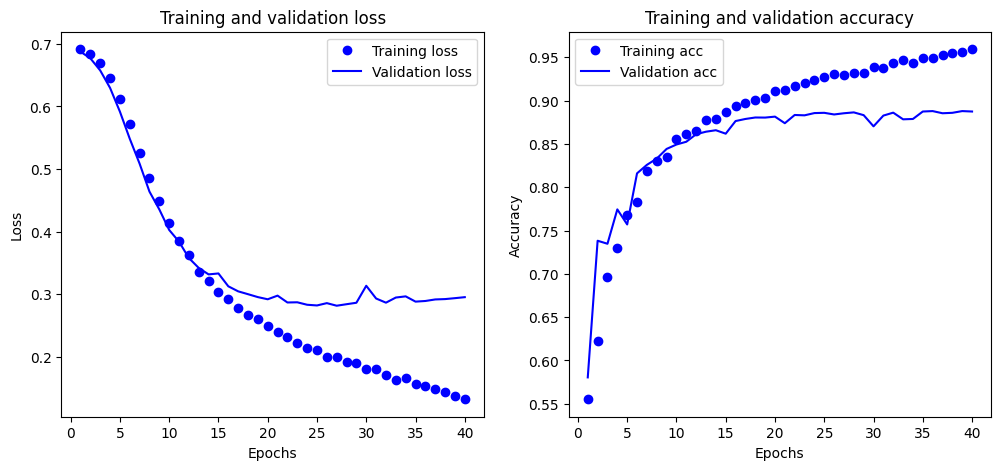

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 7. Evaluate on Test Data
After training, I tested the model on the 25,000 reviews in the **Test Set** to calculate the final accuracy.

In [24]:
results = model.evaluate(padded_test_data, test_labels, verbose=2)

print("\nFinal Test Results (with Dropout):")
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")

782/782 - 2s - 2ms/step - accuracy: 0.8780 - loss: 0.3135

Final Test Results (with Dropout):
Loss: 0.3135489821434021
Accuracy: 0.8780400156974792


## 8. Predict on New Data
I wrote a custom function to test my own reviews.
**Steps:**
1.  Tokenize the text (convert words to numbers using the IMDb word index).
2.  Pad the sequence to length 250.
3.  Pass it to the model.

**Test Case 1:** A clearly positive review to verify the model detects satisfaction.

In [25]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

my_review = "The movie was great and I really liked it"

word_index = imdb.get_word_index()

tokens = [word_index.get(word, 2) + 3 for word in my_review.lower().split()]

padded_tokens = pad_sequences([ [1] + tokens ], maxlen=250)

prediction = model.predict(padded_tokens)
probability = prediction[0][0]

print(f"\nReview: '{my_review}'")
print(f"Prediction Score: {probability:.4f}")

if probability > 0.5:
    print("Result: This is a POSITIVE review.")
else:
    print("Result: This is a NEGATIVE review.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

Review: 'The movie was great and I really liked it'
Prediction Score: 0.8364
Result: This is a POSITIVE review.


**Test Case 2:** A negative review with mixed words (e.g., "good parts" but "ruined"). I wanted to see if the model could understand context rather than just spotting keywords.

In [26]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

my_review = "The movie had some good parts but the ending was a complete letdown and ruined the whole experience"

word_index = imdb.get_word_index()

tokens = [word_index.get(word, 2) + 3 for word in my_review.lower().split()]

padded_tokens = pad_sequences([ [1] + tokens ], maxlen=250)

prediction = model.predict(padded_tokens)
probability = prediction[0][0]

print(f"\nReview: '{my_review}'")
print(f"Prediction Score: {probability:.4f}")

if probability > 0.5:
    print("Result: This is a POSITIVE review.")
else:
    print("Result: This is a NEGATIVE review.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Review: 'The movie had some good parts but the ending was a complete letdown and ruined the whole experience'
Prediction Score: 0.3951
Result: This is a NEGATIVE review.


# Conclusion & Key Learnings

In this project, I successfully developed a neural network capable of classifying IMDb movie reviews. My final, improved model achieved a **test accuracy of 87.8%**.

**Key Takeaways:**
My initial model established a strong baseline but showed clear signs of **overfitting**.
To address this, I introduced **Dropout layers**, which proved to be highly effective:
1.  The training and validation curves tracked each other much more closely.
2.  The model became more robust and generalized better to unseen data.

**Next Steps:**
To improve accuracy beyond 88%, I plan to explore **Recurrent Neural Networks (RNNs/LSTMs)** or **Transformer models**, which are better at understanding the order and context of words than the simple averaging method I used here.